# D212 Data Mining II Performance Assessment Task 2
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D212 assessment for Data Mining II.  This notebook will be used in conjunction with a written document to perform Principal Component Analysis.  Concepts that will be explored in this notebook will be:

- Perform Principal Component Analysis
- Data preparation 
- Data Analysis.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information about the dataframe. 

In [1]:
# Import the apprpriate libriaries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

# Show all columns.
pd.set_option('display.max_columns', None)

Read in the data from the CSV file.
Read on only the columns that will be used to create the clustering model.

In [2]:
# Read in only the columns that are required for the assessment.
# Description of these columns can be found in the written document that 
# accompanies this file.

feature_cols = {'Lat','Lng', 'Children', 'Age','Income', 'VitD_levels', 'Doc_visits'
                ,'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge'
                ,'Additional_charges'} 

medical_df = pd.read_csv('medical_clean.csv', usecols=feature_cols)

# Print some information about  the data that is in the dataframe
medical_df.head()
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Full_meals_eaten    10000 non-null  int64  
 8   vitD_supp           10000 non-null  int64  
 9   Initial_days        10000 non-null  float64
 10  TotalCharge         10000 non-null  float64
 11  Additional_charges  10000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 937.6 KB


## Sections A and B can be found in the written document. 


# C2. Data preparation 
**Note:**  There will be no formal data preparation used in this assessment.  The data that was provided by the university is in a good enough state to be used to perform. The only data preparation that will be undertaken.  This is to be in accordance with what is stated in the requirements of the assessment.
**Note:** The only data preparation will be the standardization of the data tha was read into the dataframe.  To standardize, the data will be passed to the StandardScaler method that is found in the sklearn library.


## Standardize the data.
The data in the dataframe will be standardized using the StandardScaler method.  This to allow for performing PCA.

In [3]:
# Retrieve the columns from the orignal dataframe.
med_cols = medical_df.columns

# Step C2. Standardize the data and then output to the standarized file to a CSV file
# Create the scaler object.
std_scaler = StandardScaler()

# Fit the data using the scaler.
std_scaler.fit(medical_df)

# Create a new dataframe that has the scaled data.
# pass in the names of the columns to be associated with the data.
medical_scaled_df = pd.DataFrame(std_scaler.transform(medical_df)
                                 , columns=med_cols)


In [4]:
# Check to see if the dataframe was created and it contains the right data.
# Transpose the data for a different look**.

print(medical_scaled_df.head().T) 
print("\n\n")
print(medical_scaled_df.info())
print("\n",medical_scaled_df.shape)


                           0         1         2         3         4
Lat                -0.814668 -1.463305  0.886966  0.952530 -0.213252
Lng                 0.297134  0.395522 -0.354788 -0.149403  0.943984
Children           -0.507129  0.417277  0.417277 -0.969332 -0.507129
Age                -0.024795 -0.121706 -0.024795  1.186592 -1.526914
Income              1.615914  0.221443 -0.915870 -0.026263 -1.377325
VitD_levels         0.583603  0.483901  0.046227 -0.687811 -0.260366
Doc_visits          0.944647 -0.967981 -0.967981 -0.967981 -0.011667
Full_meals_eaten   -0.993387  0.990609 -0.001389 -0.001389 -0.993387
vitD_supp          -0.634713  0.956445 -0.634713 -0.634713  2.547602
Initial_days       -0.907310 -0.734595 -1.128292 -1.244503 -1.261991
TotalCharge        -0.727185 -0.513228 -1.319983 -1.460517 -1.467285
Additional_charges  0.765005  0.715114  0.698635  0.009004 -1.408991



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 co

### Output the standardized data to a CSV file.


In [5]:
# Output or export the standardized data to a CSV file.
medical_scaled_df.to_csv('Heino_D212_Task2_Standardized_Data.csv'
                         , index=False, header=True) 

# Section D Performing the PCA Analysis of the Features

You will find the code that sets up the PCA analysis as well as other items that pertain to Section D of the assessment in this section 

Items that you will find in this section are located in the table below:
- The matrix of all the principal components from the analysis.
- The identification of the principal components using the Elbow Method.
- A Scree plot.
- Identification of the variance of the components.
- Identification of the total variance.

**Note:** Section D5 - the summary of the analysis will be found in the written document and will not be included in the Notebook.


In [6]:
# Section D Performing the PCA Analysis of the Features
# Two arguments will be passed the number of components (n_component) 
# and the random_state to allow for reproducibility.

# Create a list with the columns
col_list = []
count = 1

for cols in medical_scaled_df.columns:
    col_list.append("PC" + str(count))
    count = count + 1
    

## Section D1. Create the PCA object to perform the analysis.

In [7]:
# Create and instantiate the PCA object.
pca = PCA(n_components=medical_scaled_df.shape[1], random_state=247)

# Fit the PCA to the standardized data (medical_scaled_df)
med_pca = pca.fit_transform(medical_scaled_df)

# Create the matrix of the PCA components.
pca_matrix = pd.DataFrame(pca.components_.T,columns=col_list
                          , index=med_cols)

Show the component matrix.

In [8]:
pca_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.012895,-0.007486,0.687187,-0.135667,-0.107212,-0.051034,-0.059097,-0.108140,-0.020018,-0.692418,0.003807,0.001501
Lng,-0.010768,0.009813,-0.688638,0.120402,-0.018663,-0.080167,0.071562,-0.113573,0.103775,-0.689539,-0.006417,-0.000392
Children,0.034572,0.017142,0.126810,0.116138,0.419601,0.490569,0.627805,-0.249601,0.308651,-0.022365,0.003515,-0.000940
Age,0.086188,0.700710,-0.005059,-0.022027,-0.010736,0.012212,-0.018108,-0.009614,-0.022037,-0.001499,0.706542,0.026301
Income,-0.020041,-0.018643,-0.086339,-0.338611,0.608572,0.335455,-0.264527,0.444538,-0.309541,-0.175605,0.002401,0.001318
VitD_levels,-0.002018,0.020421,0.097336,0.512156,0.284141,-0.389876,0.327864,0.064272,-0.617963,-0.039361,-0.002311,-0.001499
Doc_visits,-0.007301,0.015927,0.037005,-0.137770,0.590305,-0.576434,-0.232287,-0.324742,0.365516,0.074747,0.001227,-0.001123
Full_meals_eaten,-0.019931,0.030982,0.137464,0.588986,0.068444,0.002057,-0.202402,0.576764,0.498517,-0.076851,0.010163,-0.001615
vitD_supp,0.025144,0.014840,-0.014191,-0.457921,-0.087537,-0.391142,0.567635,0.522502,0.181826,-0.017914,0.000581,-0.000610
Initial_days,0.700197,-0.091993,-0.000709,0.009656,0.003608,-0.005867,-0.031388,0.008176,-0.005355,-0.014568,0.031671,-0.706275


### Show a heat map of the loading  values.

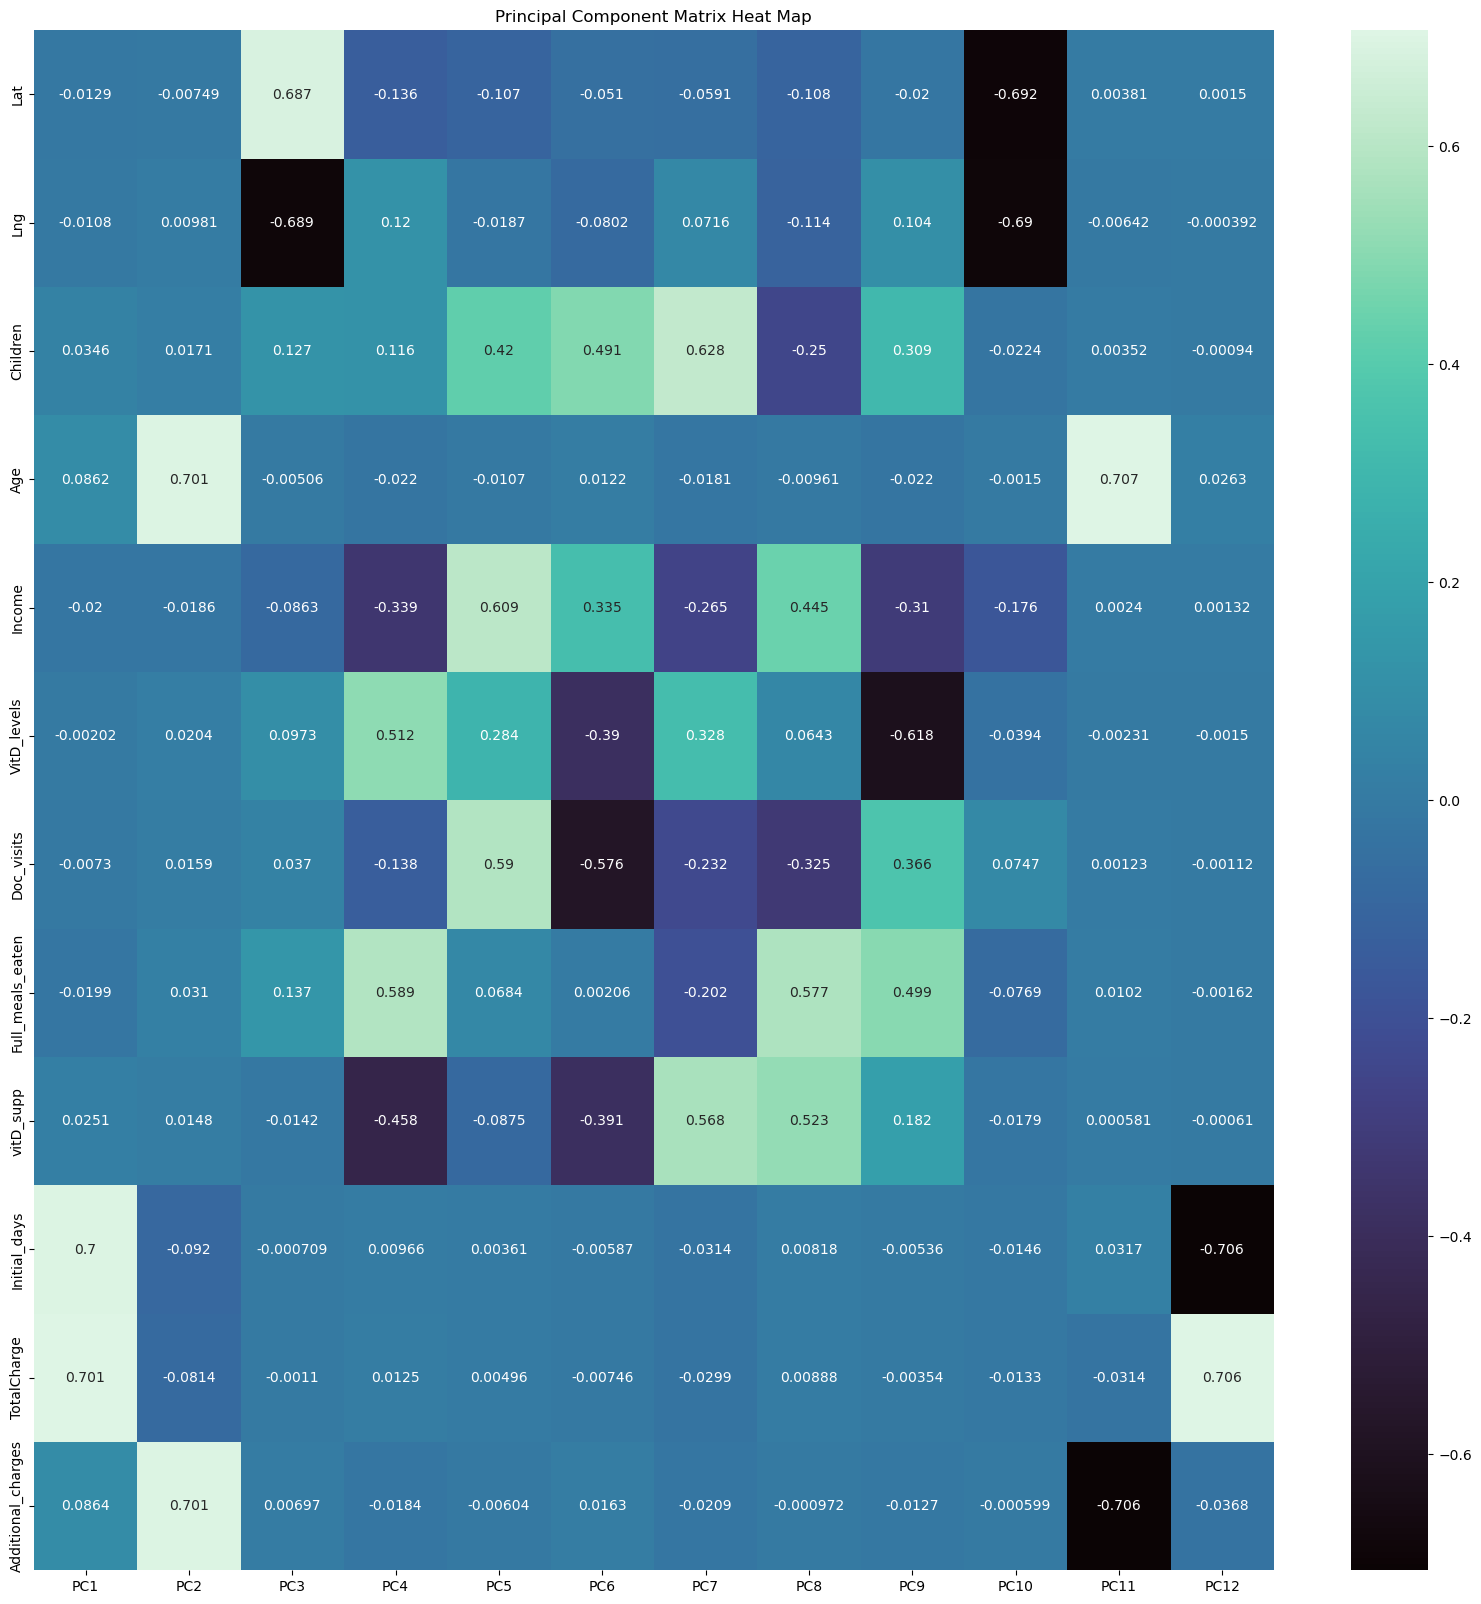

In [9]:
# Create a heatmap for the loadings of the
plt.figure(figsize=(20,20))
sns.heatmap(pca_matrix , cmap='mako',annot=True, fmt='.3g')
plt.title('Principal Component Matrix Heat Map')
plt.show() 

# D2. Create the Elbow plot.
-Retrieve the total varaince explained by the given list of principle components.  This can be found in the explained_varaince_ratio found in the PCA object.


In [10]:
total_var = sum(pca.explained_variance_ratio_*100).round()
print("Total variance explained by all {} of the principal components is: {}% "
      .format(pca_matrix.shape[1], total_var))


Total variance explained by all 12 of the principal components is: 100.0% 


In [11]:
# Create a dataframe with the percent of the variance captured.

var_perc = (pca.explained_variance_ratio_ * 100).round(2)

variance_df = pd.DataFrame(var_perc,columns=["Captured Variance by PC"]
                           , index=col_list)

#Retrieve the eigenvalues and add to the frame.
eigenvalues = pca.explained_variance_

# Add to the frame.
variance_df["Eigenvalues by PC"] = eigenvalues

# print the dataframe.
variance_df

,Captured Variance by PC,Eigenvalues by PC
PC1,16.62,1.994911
PC2,14.29,1.714934
PC3,9.31,1.117680
PC4,8.65,1.038585
PC5,8.45,1.014266
PC6,8.38,1.005325
PC7,8.27,0.992521
PC8,8.14,0.977249
PC9,8.06,0.967755
PC10,7.35,0.882682


Show the varainces and eigenvalues.

### Create the required Scree plot. 

In [12]:
# Calculate the cumulative sum of the variances 
pc_sum = np.cumsum(pca.explained_variance_ratio_*100)

# Add to the cumaltive sum of the variances to the dataframe.
variance_df["Sum of the Cumulative Variances by PC"] = pc_sum

# Reindex the columns to make it easier to read.
variance_df = variance_df.iloc[ : ,[0,2,1]]

variance_df

,Captured Variance by PC,Sum of the Cumulative Variances by PC,Eigenvalues by PC
PC1,16.62,16.622598,1.994911
PC2,14.29,30.912288,1.714934
PC3,9.31,40.225353,1.117680
PC4,8.65,48.879366,1.038585
PC5,8.45,57.330742,1.014266
PC6,8.38,65.707612,1.005325
PC7,8.27,73.977794,0.992521
PC8,8.14,82.120725,0.977249
PC9,8.06,90.184542,0.967755
PC10,7.35,97.539493,0.882682


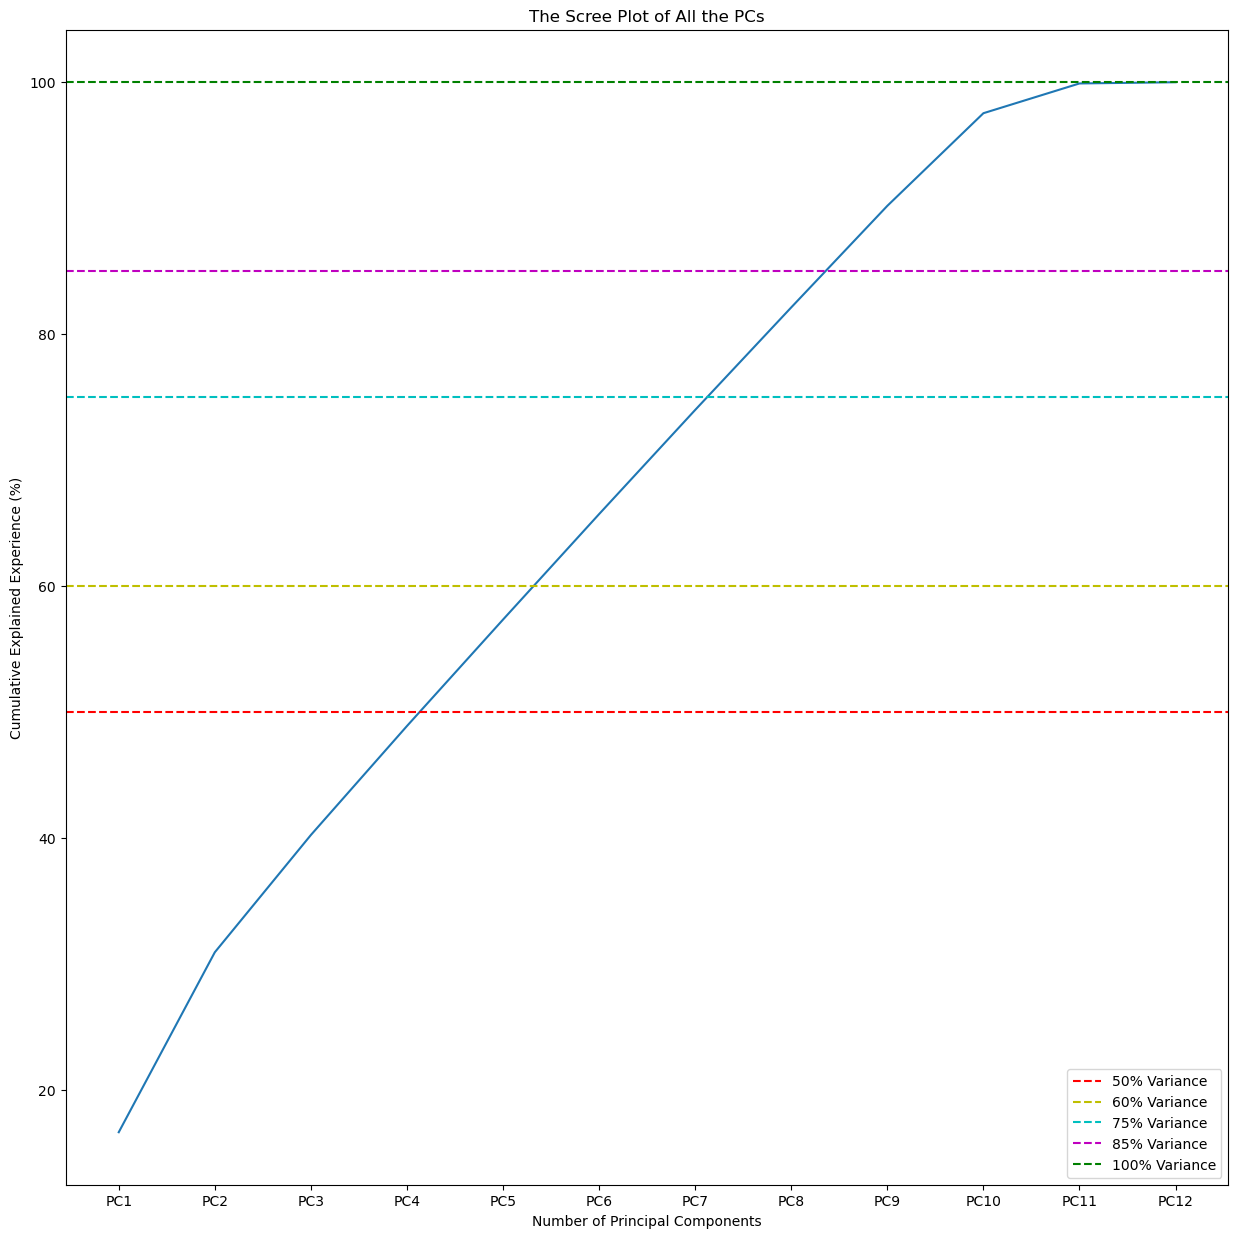

In [13]:
# Create the required Scree plot.
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(pc_sum)
plt.title("The Scree Plot of All the PCs")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Experience (%)")
ax.set_xticks(range(0, medical_scaled_df.shape[1]))
ax.set_xticklabels(col_list)

# Add some percent lines to the graph
plt.axhline(y = 50, color='r', linestyle='--', label='50% Variance')
plt.axhline(y = 60, color='y', linestyle='--', label='60% Variance')
plt.axhline(y = 75, color='c', linestyle='--', label='75% Variance')
plt.axhline(y = 85, color='m', linestyle='--', label='85% Variance')
plt.axhline(y = 100, color='g', linestyle='--', label='100% Variance')

# Add a legend to the plot.
plt.legend(loc='lower right')

plt.show()


## Create a informative graph about the cumulative variances.

This section shows a graph about the cumalative variances that shouws a step graph and a bar graph.  All values are given as percentages. It was to make it easier to understand when displayed as a graph. 

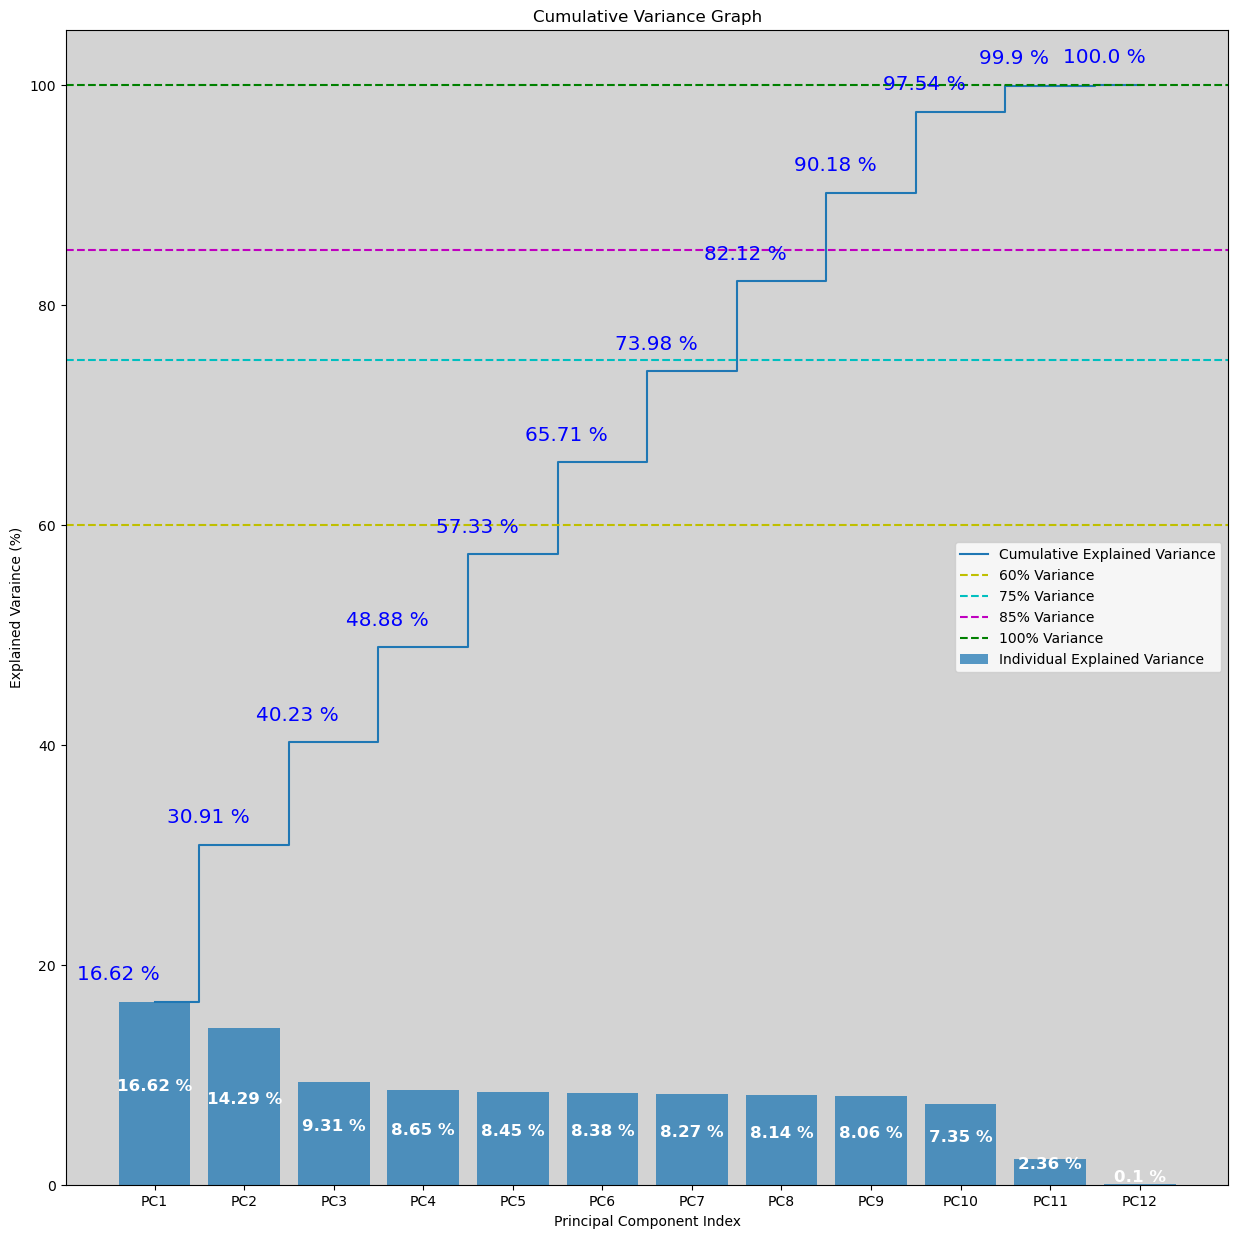

In [14]:
# code adapted from "PCA Explained Variance Concepts with Python Example"
# (Kumar, 2023)

# Graph of the cumulative variances by PC number.
var_pca = pca.explained_variance_ratio_ * 100

# Rounded values to make it easier to add the text to the bars of the graph.
var_pca_rnd = var_pca.round(2)

cumualitve_eigenvalues = np.cumsum(var_pca)

labels = [f"{i}" for i in var_pca_rnd]

# Set up the graph.
fig, ax = plt.subplots(figsize=(15,15))

ax.set_facecolor('lightgray')

plt.bar(range(0, len(var_pca)), var_pca, alpha=0.75, align='center'
        , tick_label=col_list, label="Individual Explained Variance")

plt.step(range(0, len(cumualitve_eigenvalues)), cumualitve_eigenvalues
         , where='mid', label='Cumulative Explained Variance')   

plt.title('Cumulative Variance Graph')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Varaince (%)')

# Add some variance percent lines.
plt.axhline(y = 60, color='y', linestyle='--', label='60% Variance')
plt.axhline(y = 75, color='c', linestyle='--', label='75% Variance')
plt.axhline(y = 85, color='m', linestyle='--', label='85% Variance')
plt.axhline(y = 100, color='g', linestyle='--', label='100% Variance')

# add some labels
rectangles = ax.patches

labels2 = variance_df['Sum of the Cumulative Variances by PC'].tolist()

# Create the labels
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2 , height / 2, str(label) + ' %', 
        ha='center', va='bottom', color='white', fontsize='large', fontweight='bold')

# Create labels for the step plot.
for rect2, label2 in zip(rectangles, labels2):
   ax.text(rect2.get_x(), label2 + 2 , str(round(label2, 2)) + ' %'
           , ha='center', color='blue', fontsize='x-large')
    
# Add a legend on the graph.
plt.legend(loc='best')

plt.show()